In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data.csv").iloc[:,1:]
df.head(10)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [5]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [7]:
print("Continuous variables are: ",list(df.columns[df.dtypes != "object"]))
print("Categorical variables are: ",list(df.columns[df.dtypes == "object"]))

Continuous variables are:  ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
Categorical variables are:  ['street', 'city', 'statezip', 'country']


According to further look at features: 
Categorical variables are:  'street', 'city', 'statezip', 'country','waterfront', 'view', 'condition',yr_renovated
Continuous variables are:  'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  'sqft_above', 'sqft_basement', 'yr_built',

In [8]:
df= df.loc[(df.price != 0), :]

#### 2.2 

(array([ 79., 112.,  79.,  96., 175.,  93.,  38., 194., 189., 271., 258.,
        278., 282., 152., 368., 229., 363., 223., 362., 489., 270.]),
 array([1900.        , 1905.42857143, 1910.85714286, 1916.28571429,
        1921.71428571, 1927.14285714, 1932.57142857, 1938.        ,
        1943.42857143, 1948.85714286, 1954.28571429, 1959.71428571,
        1965.14285714, 1970.57142857, 1976.        , 1981.42857143,
        1986.85714286, 1992.28571429, 1997.71428571, 2003.14285714,
        2008.57142857, 2014.        ]),
 <a list of 21 Patch objects>)

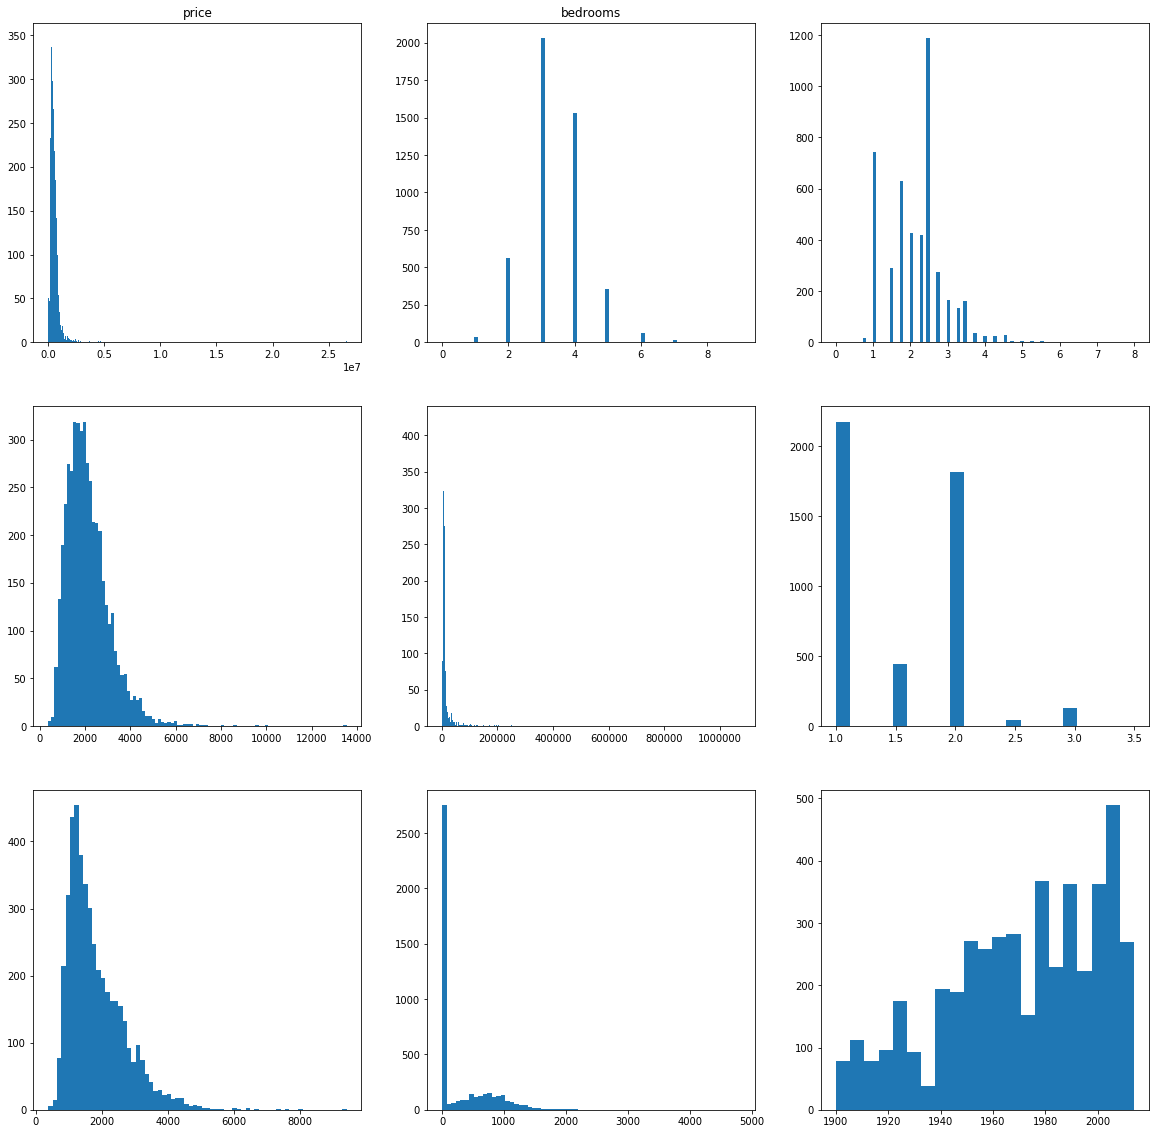

In [17]:
fig, axes=plt.subplots(3,3,figsize=(20,20))
axes[0,0].hist(df['price'],bins = "auto")
axes[0,0].set_title('price')
axes[0,1].hist(df['bedrooms'], bins = "auto")
axes[0,1].set_title('bedrooms')
axes[0,2].hist(df['bathrooms'], bins = "auto")
#axes[2].hist(df['bathrooms'])
axes[1,0].hist(df['sqft_living'], bins = "auto")
#axes[3].hist(df['sqft_living'])
axes[1,1].hist(df['sqft_lot'], bins = "auto")
#axes[4].hist(df['sqft_lot'])     
axes[1,2].hist(df['floors'], bins = "auto")
#axes[5].hist(df['floors']) 
axes[2,0].hist(df['sqft_above'], bins = "auto")
#axes[6].hist(df['sqft_above']) 
axes[2,1].hist(df['sqft_basement'], bins = "auto")
#axes[7].hist(df['sqft_basement']) 
axes[2,2].hist(df['yr_built'], bins = "auto")


Floor can be viewed as continuous or categorical value. 

#### 2.3

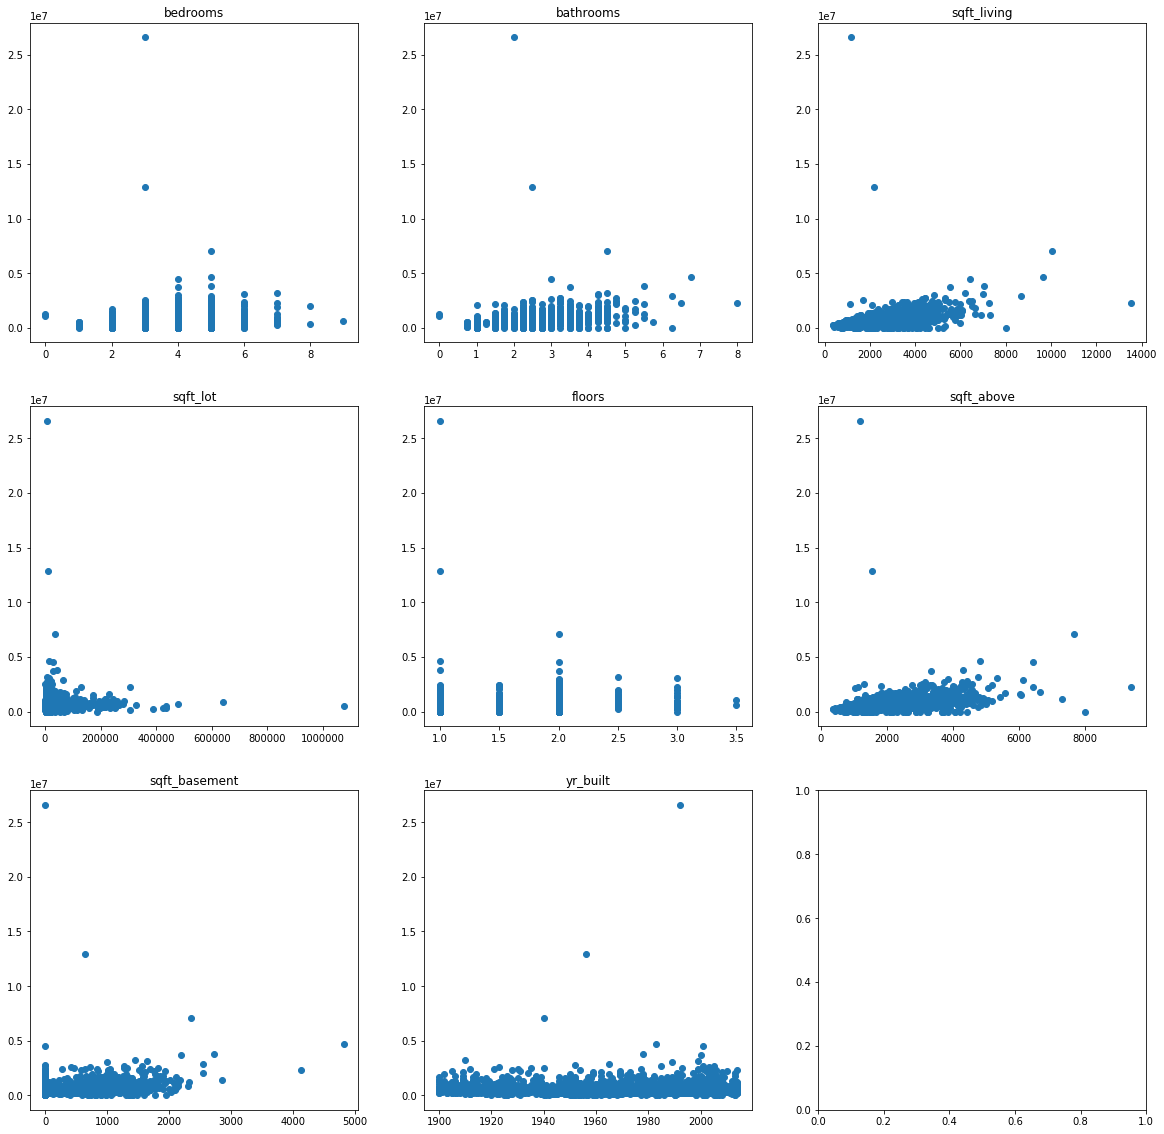

In [21]:
continuous=[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built']
fig,axes = plt.subplots(3,3,figsize=(20,20))
for i in range(0, 8):
    if i in range(0,3):
        axes[0,i].set_title(continuous[i])
        axes[0,i].scatter(df[continuous[i]],df['price'])
    if i in range(3,6):
        axes[1,i-3].set_title(continuous[i])
        axes[1,i-3].scatter(df[continuous[i]],df['price'])
    if i in range(6,8):
        axes[2,i-6].set_title(continuous[i])
        axes[2,i-6].scatter(df[continuous[i]],df['price'])
    
    

##### 2.4 
Split data in training and test set. Do not use the test-set unless for a final evaluation in 2.5.
Use ColumnTransformer and pipeline to encode categorical variables (your choice of
OneHotEncoder or another one from the categorical_encoder package, or both). Impute missing
values using SimpleImputer. Evaluate Linear Regression (OLS), Ridge, Lasso and ElasticNet
using cross-validation with the default parameters. Does scaling the data (within the pipeline)
with StandardScaler help? Use the preprocessing that works best going forward.

In [131]:
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
df = df.drop(columns = ['street'])
y=df.iloc[:,0]

X=df.iloc[:,1:]
X.shape

(4600, 15)

In [132]:
Xtrain, Xtest,ytrain, ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#categorical= df[i]  in [ 'street', 'city', 'statezip', 'country','waterfront', 'view', 'condition','yr_renovated']

In [133]:
categorical=(X.dtypes=='object') | (X.dtypes=='waterfront')|(X.dtypes=='view')|(X.dtypes=='condition')|(X.dtypes=='yr_renovated')


In [90]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [85]:
#categorical=[df.columns[i] in [ 'street', 'city', 'statezip', 'country','waterfront', 'view', 'condition','yr_renovated'] for i in range(16)]

In [155]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.compose import make_column_transformer,TransformedTargetRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [145]:
"""
pipe1=make_pipeline(SimpleImputer(strategy='median',fill_value='NA'),OneHotEncoder( handle_unknown='ignore'))
pipe2=make_pipeline(SimpleImputer(strategy='median',fill_value='NA'),StandardScaler())

preprocess1=make_column_transformer((SimpleImputer(strategy='median',fill_value='NA'),~categorical),
                                   (pipe1,categorical),)


preprocess2=make_column_transformer((pipe2,~categorical),
                                   (pipe1,categorical),)
"""

In [147]:
pipe1 = make_pipeline(SimpleImputer(), StandardScaler())
pipe2 = make_pipeline(SimpleImputer(strategy='constant', fill_value='NA'), 
                          OneHotEncoder(handle_unknown='ignore'))
preprocess_1 = make_column_transformer(
    (pipe1, ~categorical),
    (pipe2, categorical))
preprocess_2 = make_column_transformer(
    (SimpleImputer(), ~categorical),
    (pipe2, categorical))

In [149]:
# Linear Regression
reg1 = make_pipeline(preprocess_1, LinearRegression())
reg2 = make_pipeline(preprocess_2, LinearRegression())

reg_score_1 = np.mean(cross_val_score(reg1, Xtrain, ytrain, cv=10))
reg_score_2 = np.mean(cross_val_score(reg2, Xtrain, ytrain, cv=10))
print("Linear regression with scaling:", reg_score_1)
print("Linear regression without scaling:", reg_score_2)

Linear regression with scaling: 0.5054829973406901
Linear regression without scaling: 0.5056957617288573


In [153]:
#  Ridge
ridge_1=make_pipeline(preprocess_1,Ridge())
ridge_2=make_pipeline(preprocess_2,Ridge())

ridge_score_1 = np.mean(cross_val_score(ridge_1, Xtrain, ytrain, cv=10))
ridge_score_2 = np.mean(cross_val_score(ridge_2, Xtrain, ytrain, cv=10))
print("Ridge regression with scaling:", ridge_score_1 )
print("Ridge regression without scaling:", ridge_score_2)

Ridge regression with scaling: 0.5078768025358898
Ridge regression without scaling: 0.2882231886285037


In [156]:
# Lasso 
las_1=make_pipeline(preprocess_1,Lasso())
las_2=make_pipeline(preprocess_2,Lasso())

las_score_1 = np.mean(cross_val_score(las_1, Xtrain, ytrain, cv=10))
las_score_2 = np.mean(cross_val_score(las_2, Xtrain, ytrain, cv=10))
print("Lasso regression with scaling:", las_score_1 )
print("Lasso regression without scaling:", las_score_2)

Lasso regression with scaling: 0.5055360973482491
Lasso regression without scaling: 0.5055372727475325


In [157]:
# ElasticNet 
elas_1=make_pipeline(preprocess_1,ElasticNet ())
elas_2=make_pipeline(preprocess_2,ElasticNet ())

elas_score_1 = np.mean(cross_val_score(elas_1, Xtrain, ytrain, cv=10))
elas_score_2 = np.mean(cross_val_score(elas_2, Xtrain, ytrain, cv=10))
print("ElasticNet with scaling:", elas_score_1 )
print("ElasticNet without scaling:", elas_score_2)

ElasticNet with scaling: 0.3957206257271496
ElasticNet without scaling: 0.41051905040865916


Scaling significantly improves result for Ridge regression. This makes sense because ridge regression penalize large slope parameter. 

#### 2.5 
Tune the parameters of the models using GridSearchCV. Do the results improve? Visualize
the dependence of the validation score on the parameters for Ridge, Lasso and ElasticNet.

In [160]:
from sklearn.model_selection import GridSearchCV

In [168]:
#Ridge
rid_param={'ridge__alpha': np.logspace(-4, 4, 10)}
rid_grid=GridSearchCV(ridge_1,rid_param,cv=10)
rid_grid.fit(Xtrain,ytrain)
rid_grid.best_params_
rid_grid.score(Xtest,ytest)

0.7221725791563729

In [169]:
#Lasso
las_param={'lasso__alpha': np.logspace(-4, 4, 10)}
las_grid=GridSearchCV(las_1,las_param,cv=10)
las_grid.fit(Xtrain,ytrain)
print(las_grid.best_params_)
print('score on test set:', las_grid.score(Xtest,ytest))

{'lasso__alpha': 166.81005372000558}
score on test set: 0.7238208881216006


In [170]:
#ElasticNet
elas_param={'elasticnet__alpha': np.logspace(-4, 4, 10)}
elas_grid=GridSearchCV(elas_1,elas_param,cv=10)
elas_grid.fit(Xtrain,ytrain)
print(elas_grid.best_params_)
print('score on test set:', elas_grid.score(Xtest,ytest))

{'elasticnet__alpha': 0.005994842503189409}
score on test set: 0.7141423381496586


Yes, the result improves after gridsearch. 


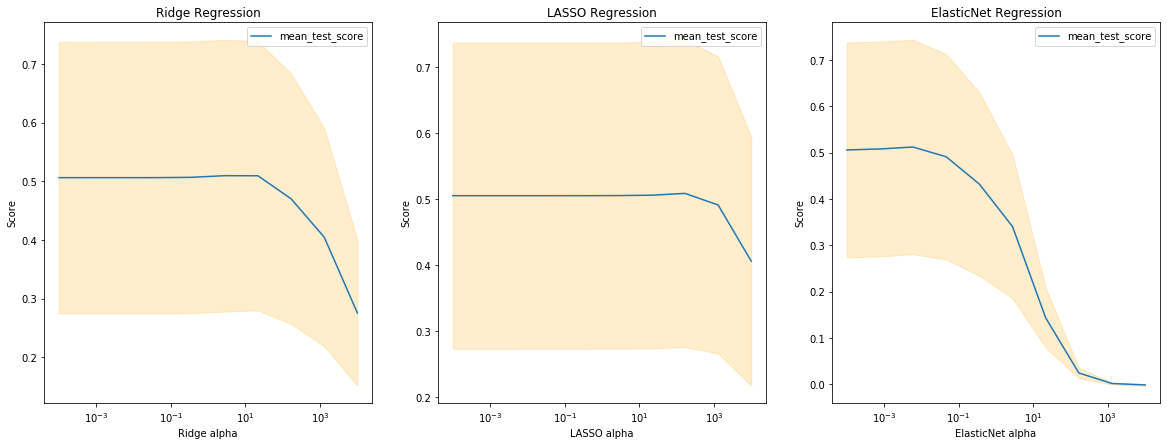

In [179]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 7));


axes[0].semilogx(rid_grid.cv_results_['param_ridge__alpha'].data, 
             rid_grid.cv_results_['mean_test_score'], label = "mean_test_score");
axes[0].fill_between(np.logspace(-4, 4, 10),
                       rid_grid.cv_results_['mean_test_score'] - rid_grid.cv_results_['std_test_score'],
                       rid_grid.cv_results_['mean_test_score'] + rid_grid.cv_results_['std_test_score'],
                       alpha=0.2, color='orange');

axes[0].legend();
axes[0].set_xlabel('Ridge alpha');
axes[0].set_ylabel('Score');
axes[0].set_title('Ridge Regression');

# LASSO plot

axes[1].semilogx(las_grid.cv_results_['param_lasso__alpha'].data, 
             las_grid.cv_results_['mean_test_score'], label = "mean_test_score");
axes[1].fill_between(np.logspace(-4, 4, 10),
                       las_grid.cv_results_['mean_test_score'] - las_grid.cv_results_['std_test_score'],
                       las_grid.cv_results_['mean_test_score'] + las_grid.cv_results_['std_test_score'],
                       alpha=0.2, color='orange');
axes[1].legend();
axes[1].set_xlabel('LASSO alpha');
axes[1].set_ylabel('Score');
axes[1].set_title('LASSO Regression');

# ElasticNet

axes[2].semilogx(elas_grid.cv_results_['param_elasticnet__alpha'].data, 
             elas_grid.cv_results_['mean_test_score'], label = "mean_test_score");
axes[2].fill_between(np.logspace(-4, 4, 10),
                       elas_grid.cv_results_['mean_test_score'] - elas_grid.cv_results_['std_test_score'],
                       elas_grid.cv_results_['mean_test_score'] + elas_grid.cv_results_['std_test_score'],
                       alpha=0.2, color='orange');
axes[2].legend();
axes[2].set_xlabel('ElasticNet alpha');
axes[2].set_ylabel('Score');
axes[2].set_title('ElasticNet Regression');



#### 2.6 
Visualize the 20 most important coefficients of the resulting models. Do they agree on which
features are important?

In [202]:
# Ridge
X_dummy = pd.get_dummies(X)

rid_top = np.abs(rid_grid.best_estimator_[1].coef_)
rid_top_20 = rid_top.argsort()[-20:][::-1]
rid_top_20 = np.sort(rid_top_20)

list(X_dummy.columns[rid_top_20])

['city_Bellevue',
 'city_Federal Way',
 'city_Medina',
 'city_Mercer Island',
 'statezip_WA 98004',
 'statezip_WA 98031',
 'statezip_WA 98039',
 'statezip_WA 98040',
 'statezip_WA 98042',
 'statezip_WA 98102',
 'statezip_WA 98105',
 'statezip_WA 98106',
 'statezip_WA 98108',
 'statezip_WA 98109',
 'statezip_WA 98112',
 'statezip_WA 98118',
 'statezip_WA 98119',
 'statezip_WA 98146',
 'statezip_WA 98178',
 'statezip_WA 98199']

Text(0.5, 1.0, 'Top 20 coefficients for ridge regression')

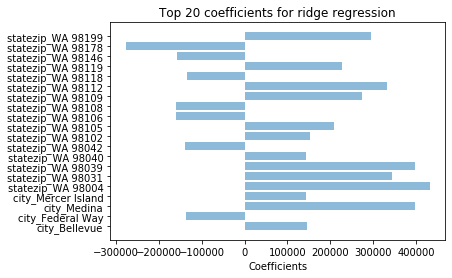

In [200]:
# Ridge 
ypos=range(0,20)
plt.barh(range(0,20),rid_grid.best_estimator_[1].coef_[rid_top_20],align='center', alpha=0.5)
plt.yticks(ypos,list(X_dummy.columns[rid_top_20]))
           
plt.xlabel("Coefficients")
plt.title("Top 20 coefficients for ridge regression")

In [210]:
# lASSO 
las_top = np.abs(las_grid.best_estimator_[1].coef_)
las_top_20 = las_top.argsort()[-20:][::-1]
las_top_20 = np.sort(las_top_20)

list(X_dummy.columns[las_top_20])

['sqft_living',
 'city_Bellevue',
 'city_Federal Way',
 'city_Medina',
 'city_Mercer Island',
 'city_Seattle',
 'statezip_WA 98004',
 'statezip_WA 98031',
 'statezip_WA 98033',
 'statezip_WA 98102',
 'statezip_WA 98105',
 'statezip_WA 98106',
 'statezip_WA 98108',
 'statezip_WA 98109',
 'statezip_WA 98112',
 'statezip_WA 98119',
 'statezip_WA 98146',
 'statezip_WA 98178',
 'statezip_WA 98198',
 'statezip_WA 98199']

Text(0.5, 1.0, 'Top 20 coefficients for LASSO')

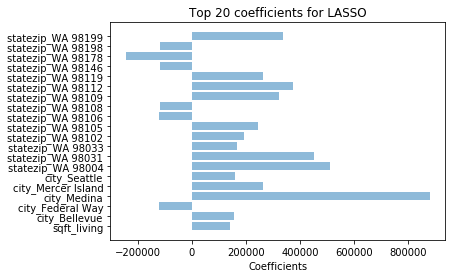

In [206]:
# Lasso
ypos=range(0,20)
plt.barh(range(0,20),las_grid.best_estimator_[1].coef_[las_top_20],align='center', alpha=0.5)
plt.yticks(ypos,list(X_dummy.columns[las_top_20]))
           
plt.xlabel("Coefficients")
plt.title("Top 20 coefficients for LASSO")

In [205]:
# ElasticNet
elas_top = np.abs(elas_grid.best_estimator_[1].coef_)
elas_top_20 = elas_top.argsort()[-20:][::-1]
elas_top_20 = np.sort(elas_top_20)

list(X_dummy.columns[elas_top_20])

['city_Bellevue',
 'city_Federal Way',
 'city_Medina',
 'city_Mercer Island',
 'city_Seattle',
 'statezip_WA 98004',
 'statezip_WA 98031',
 'statezip_WA 98039',
 'statezip_WA 98040',
 'statezip_WA 98042',
 'statezip_WA 98105',
 'statezip_WA 98106',
 'statezip_WA 98108',
 'statezip_WA 98109',
 'statezip_WA 98112',
 'statezip_WA 98118',
 'statezip_WA 98119',
 'statezip_WA 98146',
 'statezip_WA 98178',
 'statezip_WA 98199']

Text(0.5, 1.0, 'Top 20 coefficients for ElasticNet')

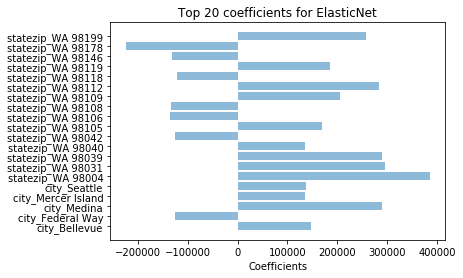

In [207]:
# ElasticNet
ypos=range(0,20)
plt.barh(range(0,20),elas_grid.best_estimator_[1].coef_[elas_top_20],align='center', alpha=0.5)
plt.yticks(ypos,list(X_dummy.columns[elas_top_20]))
           
plt.xlabel("Coefficients")
plt.title("Top 20 coefficients for ElasticNet")

These models agree highly on which coeffiients are important. 